<a href="https://colab.research.google.com/github/GautamPoddar18/Melanoma-Detection-Assignment/blob/main/mda_assignment_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Melanoma Detection Assignment**




**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

Objective: Building a multiclass classification model using a custom CNN in TensorFlow

**Data Description**
The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

1. Actinic keratosis
2. Basal cell carcinoma
3. Dermatofibroma
4. Melanoma
5. Nevus
6. Pigmented benign keratosis
7. Seborrheic keratosis
8. Squamous cell carcinoma
9. Vascular lesion

Dataset link: https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/

### Project Pipeline

In [ ]:
## Importing Libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import tensorflow.keras.preprocessing as pre

### 1. Data Reading/Data Understanding

In [ ]:
## Defining Path Variable
path_train = pathlib.Path("../input/skin-cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
path_test = pathlib.Path('../input/skin-cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
## Image Count
train_count = len(list(path_train.glob('*/*.jpg')))
print('Train Image Count', train_count)
test_count = len(list(path_test.glob('*/*.jpg')))
print('Test Image Count',test_count)

Train Image Count 2239
Test Image Count 118


### 2. Dataset creation

#### Creating the Dataset

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### Keeping 70/30 Train and Validation Dataset Ratio and using seed=123

In [ ]:
## Writing Train dataset
train_ds = pre.image_dataset_from_directory(
    path_train,
    seed=123,
    validation_split= 0.3,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1568 files for training.


In [ ]:
## Writing Validation dataset
val_ds = pre.image_dataset_from_directory(
    path_train,
    seed=123,
    validation_split= 0.3,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 671 files for validation.


In [ ]:
## Writing Test dataset
test_ds = pre.image_dataset_from_directory(
    path_test,
    seed=123,
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.


In [ ]:
print("Train Dataset Class Names :\n",train_ds.class_names)

Train Dataset Class Names :
 ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
print("Train Dataset Class Names :\n",test_ds.class_names)

Train Dataset Class Names :
 ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### 3. Dataset visualisation

In [ ]:
dataset_classes = train_ds.class_names
test_dataset_classes = test_ds.class_names

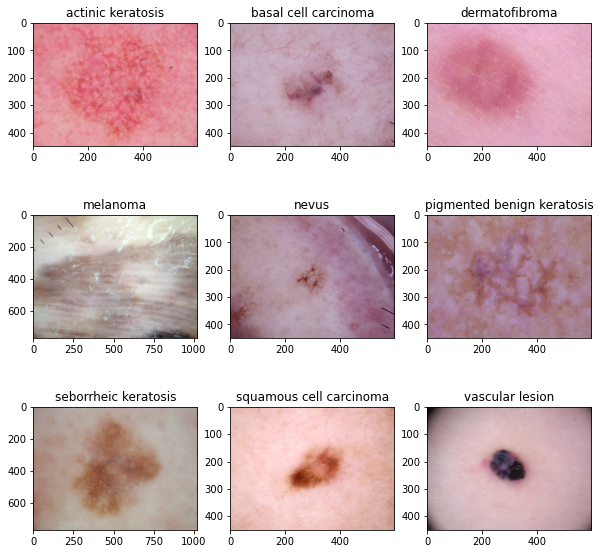

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(path_train.glob(dataset_classes[i]+'/*.jpg'))[1]))
  plt.title(dataset_classes[i])
  plt.imshow(image)

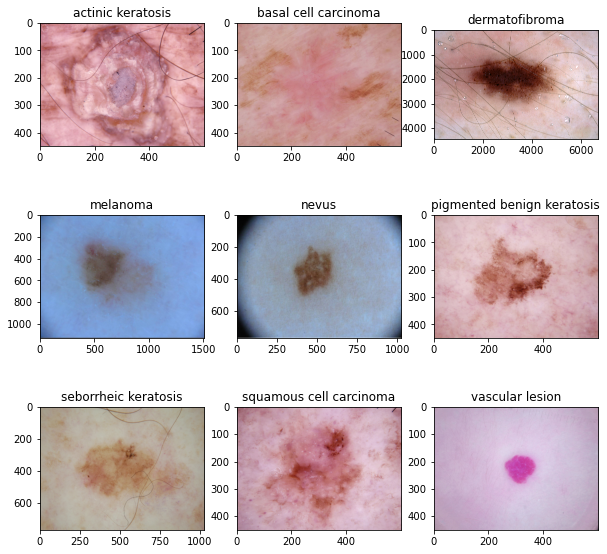

In [ ]:
# test dataset visualization
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(path_test.glob(test_dataset_classes[i]+'/*.jpg'))[1]))
  plt.title(test_dataset_classes[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.



`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 4. Model Building & training

#### Model 1

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [ ]:
## Model Defination
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [ ]:
## Model Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
## View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 32)        2

In [ ]:
## Model Training
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
49/49 [==============================] - 34s 235ms/step - loss: 2.1004 - accuracy: 0.1813 - val_loss: 2.0325 - val_accuracy: 0.2131
Epoch 2/10
49/49 [==============================] - 2s 44ms/step - loss: 2.0292 - accuracy: 0.2158 - val_loss: 2.0215 - val_accuracy: 0.1833
Epoch 3/10
49/49 [==============================] - 2s 44ms/step - loss: 1.9960 - accuracy: 0.2446 - val_loss: 1.8540 - val_accuracy: 0.3413
Epoch 4/10
49/49 [==============================] - 2s 44ms/step - loss: 2.0119 - accuracy: 0.2169 - val_loss: 2.0382 - val_accuracy: 0.2131
Epoch 5/10
49/49 [==============================] - 2s 44ms/step - loss: 2.0193 - accuracy: 0.2183 - val_loss: 2.0427 - val_accuracy: 0.2131
Epoch 6/10
49/49 [==============================] - 2s 44ms/step - loss: 2.0185 - accuracy: 0.1741 - val_loss: 2.0481 - val_accuracy: 0.2131
Epoch 7/10
49/49 [==============================] - 2s 44ms/step - loss: 2.0083 - accuracy: 0.2284 - val_loss: 2.0501 - val_accuracy: 0.1714
Epoch 8/10


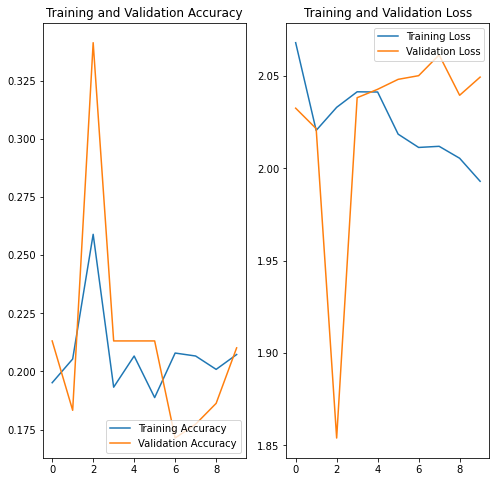

In [ ]:
## Visualizing Training Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Since no pattern observed, increasing the number of epochs to 30 for observation**

In [ ]:
## Model Training Epoch =20
epochs=20
history_epoch20 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
49/49 [==============================] - 2s 45ms/step - loss: 1.9939 - accuracy: 0.2041 - val_loss: 2.0648 - val_accuracy: 0.2116
Epoch 2/20
49/49 [==============================] - 2s 44ms/step - loss: 1.9926 - accuracy: 0.2085 - val_loss: 2.0761 - val_accuracy: 0.2072
Epoch 3/20
49/49 [==============================] - 2s 44ms/step - loss: 1.9800 - accuracy: 0.2162 - val_loss: 2.0243 - val_accuracy: 0.2519
Epoch 4/20
49/49 [==============================] - 2s 44ms/step - loss: 1.9640 - accuracy: 0.2379 - val_loss: 2.1032 - val_accuracy: 0.2206
Epoch 5/20
49/49 [==============================] - 2s 44ms/step - loss: 1.9651 - accuracy: 0.2430 - val_loss: 2.1305 - val_accuracy: 0.2280
Epoch 6/20
49/49 [==============================] - 2s 45ms/step - loss: 1.9231 - accuracy: 0.2621 - val_loss: 2.0230 - val_accuracy: 0.2593
Epoch 7/20
49/49 [==============================] - 2s 44ms/step - loss: 1.8298 - accuracy: 0.3202 - val_loss: 1.9206 - val_accuracy: 0.3264
Epoch 8/20
49

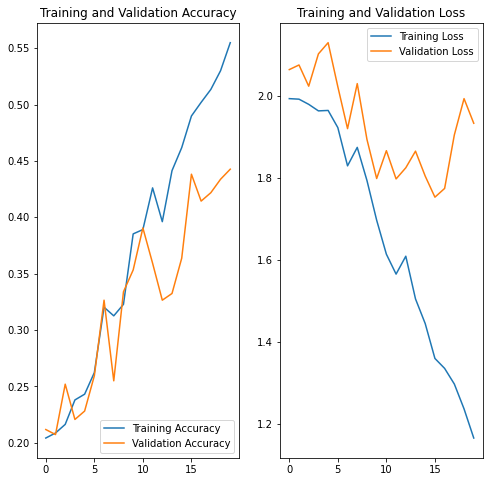

In [ ]:
## Visualizing Training Results
acc = history_epoch20.history['accuracy']
val_acc = history_epoch20.history['val_accuracy']

loss = history_epoch20.history['loss']
val_loss = history_epoch20.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Intial Findings**
There is overfitting observed in the model as validation accuracy decreases while train accuracy increases around 17th epoch

### 5. Data augmentation

In [ ]:
data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

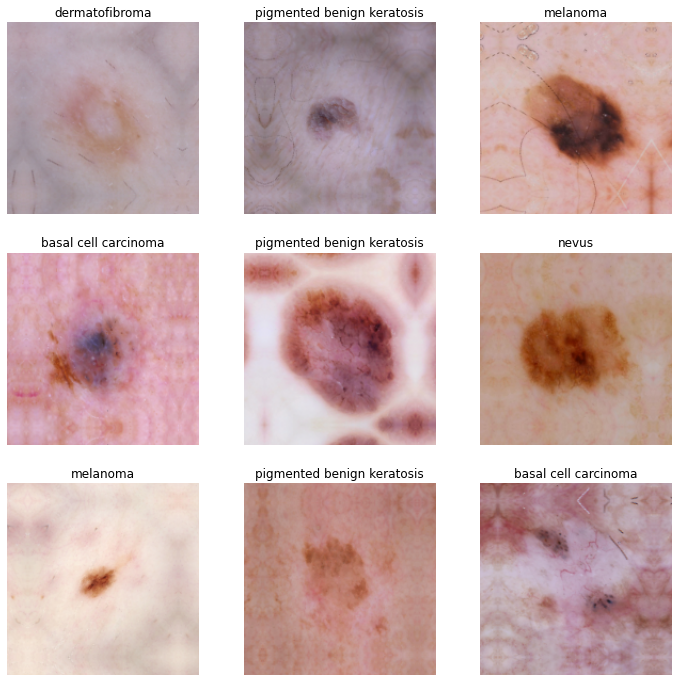

In [ ]:
# visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(dataset_classes[labels[i]])
        plt.axis("off")

### 6. Model Building & training on Augmented Data

#### Model 2

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D\

In [ ]:
## Model 2 Definition 
num_classes = 9
model2 = Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(num_classes, activation = "softmax"))

In [ ]:
## Model 2 Compilation
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
## Model 2 Training
epochs=20
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
49/49 [==============================] - 3s 49ms/step - loss: 2.1134 - accuracy: 0.1665 - val_loss: 1.8422 - val_accuracy: 0.3726
Epoch 2/20
49/49 [==============================] - 2s 46ms/step - loss: 1.9136 - accuracy: 0.2873 - val_loss: 1.8621 - val_accuracy: 0.2772
Epoch 3/20
49/49 [==============================] - 2s 46ms/step - loss: 1.8553 - accuracy: 0.2996 - val_loss: 1.8271 - val_accuracy: 0.2921
Epoch 4/20
49/49 [==============================] - 2s 46ms/step - loss: 1.7983 - accuracy: 0.3055 - val_loss: 1.6781 - val_accuracy: 0.3681
Epoch 5/20
49/49 [==============================] - 2s 46ms/step - loss: 1.6717 - accuracy: 0.3764 - val_loss: 1.6784 - val_accuracy: 0.4024
Epoch 6/20
49/49 [==============================] - 2s 46ms/step - loss: 1.6500 - accuracy: 0.3856 - val_loss: 1.5755 - val_accuracy: 0.4635
Epoch 7/20
49/49 [==============================] - 2s 46ms/step - loss: 1.5865 - accuracy: 0.4233 - val_loss: 1.6585 - val_accuracy: 0.4173
Epoch 8/20
49

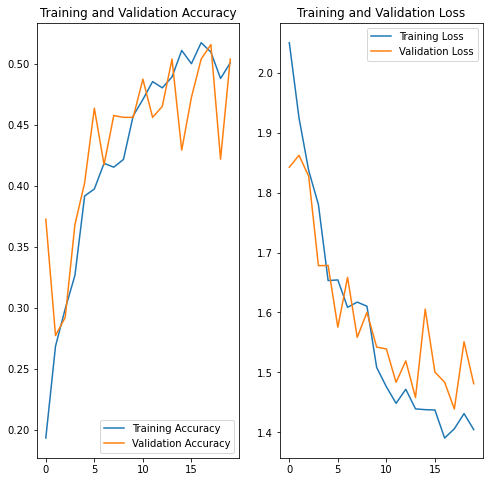

In [ ]:
# Model 2 Visualizaiton
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Increasing Epochs to 30

In [ ]:
## Model 2 Training
epochs=30
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
49/49 [==============================] - 2s 46ms/step - loss: 1.3557 - accuracy: 0.5172 - val_loss: 1.4161 - val_accuracy: 0.5306
Epoch 2/30
49/49 [==============================] - 2s 46ms/step - loss: 1.3580 - accuracy: 0.5172 - val_loss: 1.4566 - val_accuracy: 0.5097
Epoch 3/30
49/49 [==============================] - 2s 46ms/step - loss: 1.3502 - accuracy: 0.5121 - val_loss: 1.4217 - val_accuracy: 0.5291
Epoch 4/30
49/49 [==============================] - 2s 45ms/step - loss: 1.3380 - accuracy: 0.5204 - val_loss: 1.4481 - val_accuracy: 0.4963
Epoch 5/30
49/49 [==============================] - 2s 46ms/step - loss: 1.3217 - accuracy: 0.5293 - val_loss: 1.3797 - val_accuracy: 0.5186
Epoch 6/30
49/49 [==============================] - 2s 46ms/step - loss: 1.2892 - accuracy: 0.5415 - val_loss: 1.3990 - val_accuracy: 0.5216
Epoch 7/30
49/49 [==============================] - 2s 46ms/step - loss: 1.3115 - accuracy: 0.5249 - val_loss: 1.4289 - val_accuracy: 0.4829
Epoch 8/30
49

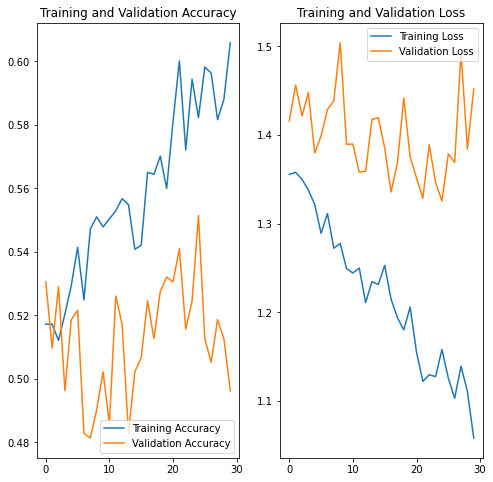

In [ ]:
# Model 2 Visualizaiton
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**No signitficant Improvement seen**

### 7. Class distribution

In [ ]:
path_list=[]
lesion_list=[]
for i in dataset_classes:
      
    for j in path_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df.head()

,Path,Label
0,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis
1,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis
2,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis
3,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis
4,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis


In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df.head()

,Path,Label
0,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis
1,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis
2,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis
3,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis
4,../input/skin-cancer/Skin cancer ISIC The Inte...,actinic keratosis


<BarContainer object of 9 artists>

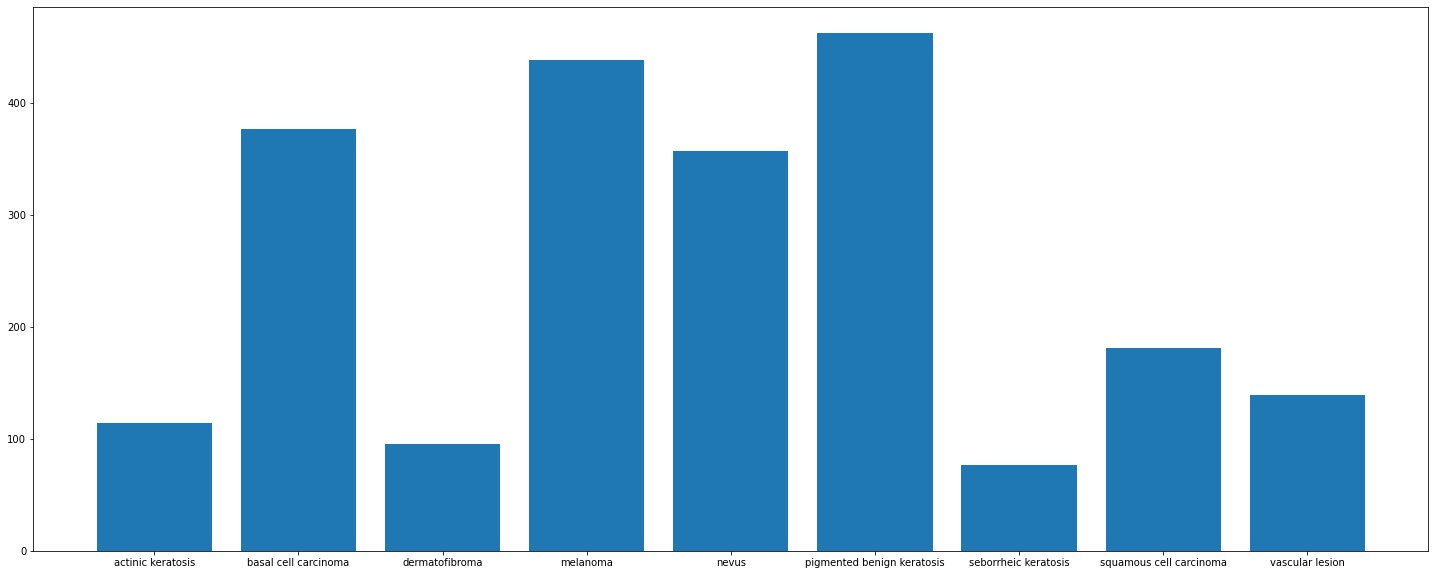

In [ ]:
count=[]
for i in dataset_classes:
    count.append(len(list(path_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(dataset_classes,count)

In [ ]:
dataset_classes

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### Observation
* Highest Distribution Class: pigmented benign keratosis
* Lowest Distribution Class: seborrheic keratosis

### 8. Handling class imbalances

### 9. Model Building & training on the rectified class imbalance data 